In [137]:
# !pip install wordcloud
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download('stopwords')
resumeDataSet = pd.read_csv('dataset/resume.csv' ,encoding='utf-8')
resumeDataSet.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sefineh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [138]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [139]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [140]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


In [141]:
unwanted_category=["Advocate","SAP Developer","Automation Testing"\
                   ,"PMO","Health and fitness","Arts","Sales","Hadoop",\
                   "ETL Developer","Testing"]
resume_df=resumeDataSet.copy()
for unwanted in unwanted_category:
    resume_df=resume_df[(resume_df!=unwanted)]
resume_df=resume_df.dropna()

In [142]:
resume_df.Category.unique()

array(['Data Science', 'HR', 'Web Designing', 'Mechanical Engineer',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'Electrical Engineering', 'Operations Manager', 'Python Developer',
       'DevOps Engineer', 'Network Security Engineer', 'Database',
       'DotNet Developer', 'Blockchain'], dtype=object)

In [143]:
resume_df.Category.value_counts()

Java Developer               84
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Data Science                 40
Mechanical Engineer          40
Operations Manager           40
Blockchain                   40
Database                     33
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Network Security Engineer    25
Civil Engineer               24
Name: Category, dtype: int64

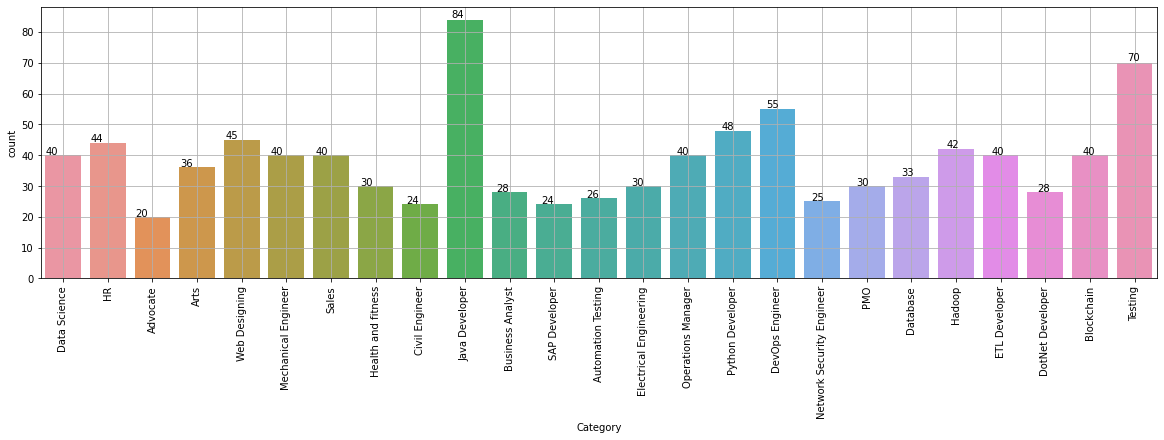

In [144]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

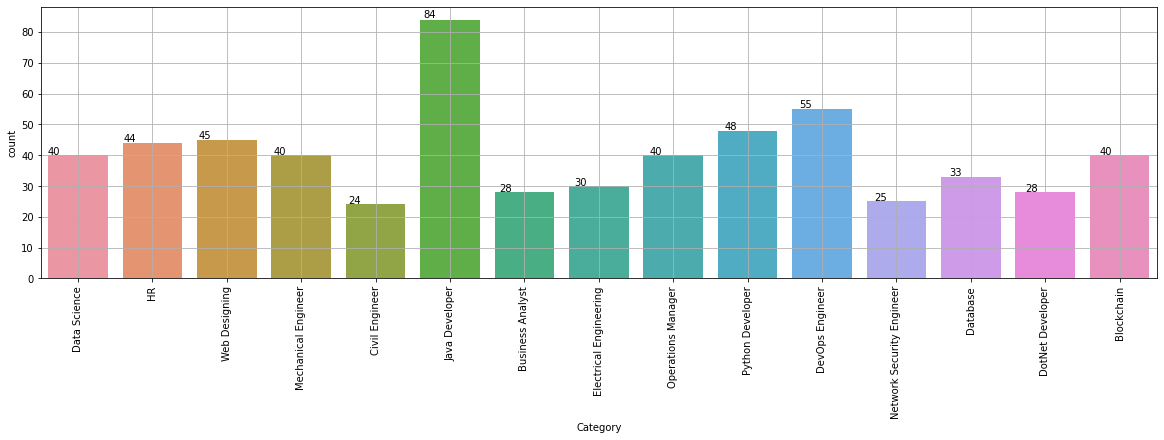

In [111]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resume_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

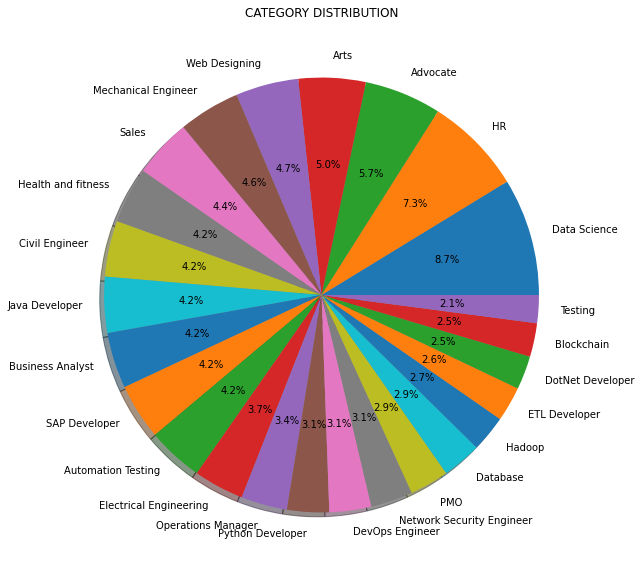

In [112]:
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [145]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resume_df['cleaned_resume'] = resume_df.Resume.apply(lambda x: cleanResume(x))


In [146]:
resume_df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [147]:
resume_copied_df=resume_df.copy()


In [148]:
# nltk.download('punkt')
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_df['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)

print(mostcommon)

[('Exprience', 2729), ('months', 2309), ('company', 2121), ('Details', 1857), ('description', 1769), ('1', 1603), ('Project', 1158), ('project', 1137), ('year', 1029), ('Less', 957), ('6', 936), ('team', 928), ('Maharashtra', 893), ('Pune', 737), ('Management', 732), ('Ltd', 711), ('Engineering', 675), ('Java', 669), ('C', 643), ('January', 628), ('SQL', 622), ('Skill', 618), ('Technologies', 570), ('System', 556), ('Pvt', 543), ('using', 541), ('application', 540), ('development', 536), ('Database', 521), ('Developer', 516), ('Education', 514), ('monthsCompany', 503), ('Software', 502), ('Python', 499), ('2', 497), ('India', 486), ('A', 485), ('customer', 463), ('data', 462), ('requirements', 460), ('management', 456), ('database', 455), ('Operations', 455), ('client', 441), ('University', 437), ('various', 433), ('Server', 431), ('I', 430), ('4', 429), ('Services', 423)]


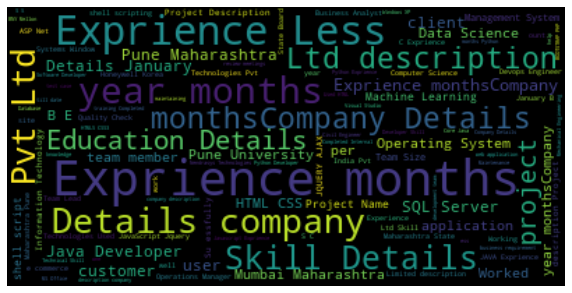

In [117]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [149]:
cat_set=set()
for cat in resume_copied_df["Category"]:
    if cat not in cat_set:
        cat_set.add(cat)
dictionary={}
mapped={}
for index,cat in enumerate(cat_set):
    dictionary[index]=cat
    mapped[cat]=index
resume_df["Category"]=resume_df["Category"].map(mapped)
resume_df.head()

,Category,Resume,cleaned_resume
0,4,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,4,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,4,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,4,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,4,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [150]:
resume_df

,Category,Resume,cleaned_resume
0,4,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,4,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,4,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,4,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,4,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
887,6,Hobbies â¢ Playing Chess â¢ Solving Rubik's ...,Hobbies Playing Chess Solving Rubik s Cube Wat...
888,6,Skills Strong CS fundamentals and problem solv...,Skills Strong CS fundamentals and problem solv...
889,6,"KEY SKILLS: Programing languages: C, C++, Pyth...",KEY SKILLS Programing languages C C Python Ape...
890,6,"SOFTWARE SKILLS: Languages: C, C++ & java Oper...",SOFTWARE SKILLS Languages C C java Operating S...


In [151]:
resume_copied_df.Category.value_counts() #understanding decode LabelEncoder

Java Developer               84
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Data Science                 40
Mechanical Engineer          40
Operations Manager           40
Blockchain                   40
Database                     33
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Network Security Engineer    25
Civil Engineer               24
Name: Category, dtype: int64

In [152]:
requiredText = resume_df['cleaned_resume'].values
requiredTarget = resume_df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")


Feature completed .....


In [153]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(483, 5811)
(121, 5811)


In [172]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))


Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98


In [173]:
text=np.array(["kills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the review process and run analytics and generate reports Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain this tool implements predictive coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyers review Understand the end to end flow of the solution doing research and development for classification models predictive analysis and mining of the information present in text data Worked on analyzing the outputs and precision monitoring for the entire tool TAR assists in predictive coding topic modelling from the evidence by following EY standards Developed the classifier models in order to identify red flags and fraud related issues Tools Technologies Python scikit learn tfidf word2vec doc2vec cosine similarity Na ve Bayes LDA NMF for topic modelling Vader and text blob for sentiment analysis Matplot lib Tableau dashboard for reporting MULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS USA CLIENTS TEXT ANALYTICS MOTOR VEHICLE CUSTOMER REVIEW DATA Received customer feedback survey data for past one year Performed sentiment Positive Negative Neutral and time series analysis on customer comments across all 4 categories Created heat map of terms by survey category based on frequency of words Extracted Positive and Negative words across all the Survey categories and plotted Word cloud Created customized tableau dashboards for effective reporting and visualizations CHATBOT Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation reservation options and so on This chat bot serves entire product related questions Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant recommended questions Tools Technologies Python Natural language processing NLTK spacy topic modelling Sentiment analysis Word Embedding scikit learn JavaScript JQuery SqlServer INFORMATION GOVERNANCE Organiza"])

In [175]:
# text=word_vectorizer.fit_transform(text)
# clf.predict(text)
# resume_df['cleaned_resume'].values[0]resume_df['cleaned_resume']
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test,\
                                                                                                prediction)))



 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      1.00      0.94        17
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      0.78      0.88         9
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         7
          13       0.83      1.00      0.91         5
          14       1.00      1.00      1.00         9

    accuracy                           0